# Анализ гипотез для увеличения выручки интернет-магазина

На основании проведенного A/B тестирования по 9 предложенным гипотезам: проведем приоритизацию гипотез через фреймворк ICE и RICE, построим графики коммулятивной выручки и среднего чека, посчитаем статистическую значимость. 

## Изучим данные

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import datetime as dt
import seaborn as sns
from IPython.display import display_html
pd.set_option('display.max_columns', 30)
pd.set_option("display.float_format", "{:.2f}".format)
pd.set_option('display.max_colwidth', None)
import warnings
warnings.simplefilter('ignore')

**Описание данных**

**Таблица `hypothesis.csv` содержит данные о гипотезах:**

`Hypothesis` — краткое описание гипотезы;

`Reach` — охват пользователей по 10-балльной шкале;

`Impact` — влияние на пользователей по 10-балльной шкале;

`Confidence` — уверенность в гипотезе по 10-балльной шкале;

`Efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

**Таблица  `orders.csv` содержит данные о заказах в период проведения A/B теста:**

`transactionId` — идентификатор заказа;

`visitorId` — идентификатор пользователя, совершившего заказ;

`date` — дата, когда был совершён заказ;

`revenue` — выручка заказа;

`group` — группа A/B-теста, в которую попал заказ.

**Таблица `visitors.csv` содержит данные о посетителях сайта в период A/B теста:**

`date` — дата;

`group` — группа A/B-теста;

`visitors` — количество пользователей в указанную дату в указанной группе A/B-теста

In [2]:
#9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort
h = pd.read_csv('/datasets/hypothesis.csv')
h.head(9)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [3]:
o = pd.read_csv('/datasets/orders.csv')
o.head(5)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [4]:
v = pd.read_csv('/datasets/visitors.csv')
v.head(5)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [5]:
d = {'hypothesis' : h, 'orders' : o, 'visitors' : v}
for a, i in d.items():
    print(f'Датафрейм {a}, количество дубликатов {i.duplicated().sum()}')
    display(i.info())
    print('- ' * 50)

Датафрейм hypothesis, количество дубликатов 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


None

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Датафрейм orders, количество дубликатов 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


None

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Датафрейм visitors, количество дубликатов 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


None

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 


In [6]:
for i in [h, o, v]:
    i.columns = [x.lower().replace(' ', '_') for x in i.columns.values]

In [7]:
#Преобразуем время
o['date'] = pd.to_datetime(o['date']).dt.date
v['date'] = pd.to_datetime(v['date']).dt.date

## Приоритизация гипотез


**Чем отличаются фреймворки ICE и RICE?**

**ICE**

Impact - влияние на пользователей
Confidence - уверенность влияния на пользователей
Efforts - трудозатраты компании

**RICE**

Reach - люди и события задействованные за определенное время

**Основное отличие заключается в том, что метод RICE скоринга предполагает ещё и оценку охвата, т.е. предполагаемой целевой аудитории проекта.**

### Фреймфорк ICE

In [8]:
h['ICE'] = h['impact'] * h['confidence'] / h['efforts']

display(h[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False))

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


### Фреймфорк RICE

In [9]:
h['RICE'] = h['reach'] * h['impact'] * h['confidence'] / h['efforts']

display(h[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False))

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.00
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.00
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.00
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.00
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.00


**Вывод:**
___

1. **Две гипотезы 7 и 0 находятся наиболее высоко в рейтинге обеих таблиц**

* `"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок" `
* `"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей"`

Форму подписки увидят все пользователи и 30% увидят новые каналы привлечения трафика

2. **Гипотезы 8 и 2**

* `"Запустить акцию, дающую скидку на товар в день рождения"`

Легче запустить, но акцию нужн еще продвинуть пользователям

* `"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа"`

Увидит большое количество пользователей, поэтому высоко находится в таблице, при этом трудозатратна, поэтому в рейтинге RICE опускается на 5 место
___

## Анализ A/B-теста

Проведем анализ A/B теста

Стоит проверить, есть ли пользователи, которые попали в обе группы.

In [10]:
dublicate = o.groupby(['visitorid']).agg({'group' : 'nunique', 'transactionid' : 'count', 'revenue' : 'sum'}).reset_index()
print(f'Количество пользователей в двух группах: {dublicate[dublicate.group != 1]["visitorid"].count()}')
print(f"Сумма заказов пользователей: {dublicate[dublicate.group != 1]['revenue'].sum()}")
print(f"Количество заказов пользователей: {dublicate[dublicate.group != 1]['transactionid'].sum()}")

Количество пользователей в двух группах: 58
Сумма заказов пользователей: 1558935
Количество заказов пользователей: 181


* 58 пользователей оказались в двух группах `orders` и `visitors`. 
* 181 заказ оформили 58 пользователей на сумму от 1,5 млн. руб. 

Стоит исключить пользователей, т.к. мы не можем соотнести их покупки к определенному типу событий.

In [11]:
actual = list(dublicate[dublicate.group != 1]['visitorid'])
o_good = o.query('visitorid not in @actual')

In [12]:
v.isna().mean().sort_values(ascending=False)

date       0.00
group      0.00
visitors   0.00
dtype: float64

In [13]:
h.isna().mean().sort_values(ascending=False)

hypothesis   0.00
reach        0.00
impact       0.00
confidence   0.00
efforts      0.00
ICE          0.00
RICE         0.00
dtype: float64

In [14]:
o.isna().mean().sort_values(ascending=False)

transactionid   0.00
visitorid       0.00
date            0.00
revenue         0.00
group           0.00
dtype: float64

### График кумулятивной выручки по группам

In [15]:
o_agg_a = o_good[o_good['group'] == 'A'].groupby('date').agg({'transactionid' : 'nunique', 
                                       'visitorid' : 'nunique', 
                                       'revenue' : 'sum'}).sort_values(by='date').cumsum().reset_index()


o_agg_b = o_good[o_good['group'] == 'B'].groupby('date').agg({'transactionid' : 'nunique', 
                                       'visitorid' : 'nunique', 
                                       'revenue' : 'sum'}).sort_values(by='date').cumsum().reset_index()

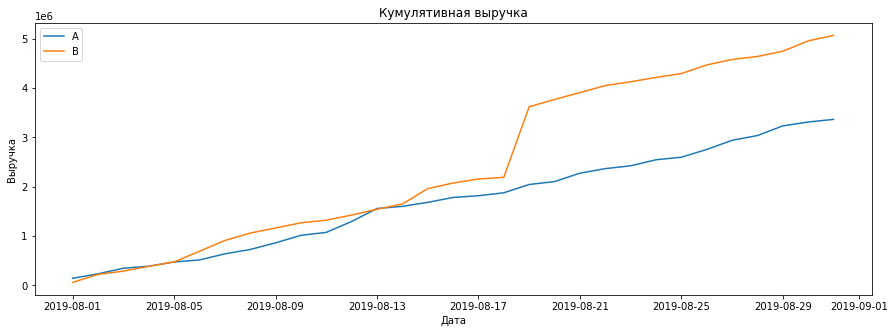

In [16]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(o_agg_a.date, o_agg_a.revenue, label = 'A')
ax.plot(o_agg_b.date, o_agg_b.revenue, label = 'B')
plt.legend()
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.title('Кумулятивная выручка')
plt.show()

Кумулятивная выручка растет в обеих группах, в течение всех дней тестирования. Есть резкий скачок в группе В после 17 августа, возможно, это связано с количеством заказов или стоимости

### Кумулятивный средний чек

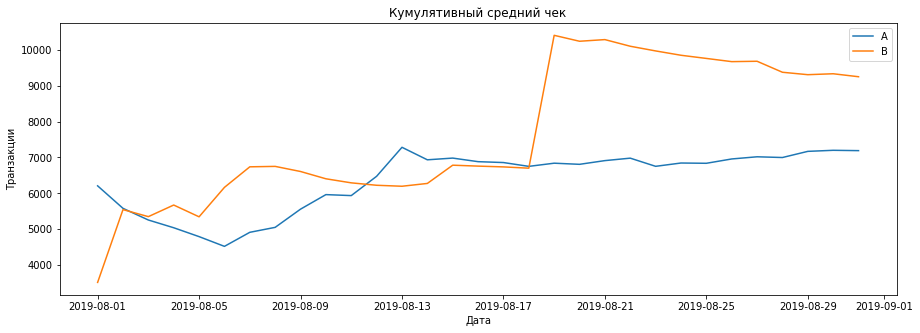

In [17]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(o_agg_a.date, o_agg_a.revenue / o_agg_a.transactionid, label = 'A')
ax.plot(o_agg_b.date, o_agg_b.revenue / o_agg_b.transactionid, label = 'B')
plt.legend()
plt.xlabel('Дата')
plt.ylabel('Транзакции')
plt.title('Кумулятивный средний чек')
plt.show()

### Относительное изменение кумулятивного среднего чека группы B к группе A

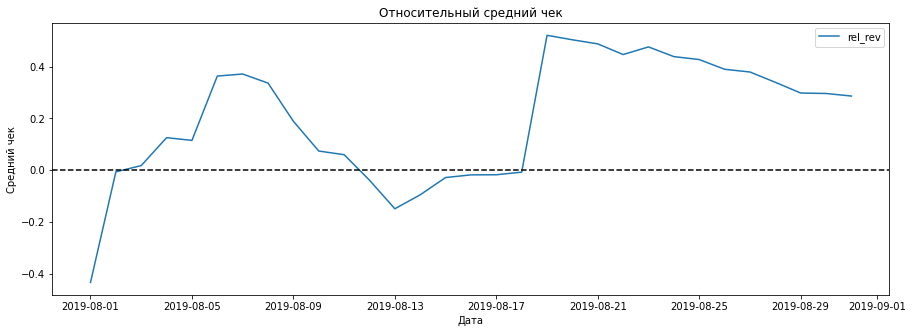

In [18]:
o_agg = o_agg_a.merge(o_agg_b, on='date', how='left', suffixes=('_A', '_B'))
o_agg['rel_rev'] = (
    (o_agg.revenue_B  / o_agg.transactionid_B ) 
    / (o_agg.revenue_A  / o_agg.transactionid_A ) - 1
)

o_agg.plot('date', 'rel_rev', figsize=(15, 5))
plt.title('Относительный средний чек')
plt.ylabel('Средний чек')
plt.xlabel('Дата')
plt.axhline(y=0, color='black', linestyle='--') 
plt.show()

Все еще видим резкий рост после 17 августа

In [19]:
#добавим посетителей
o_agg_a['v_agg_a'] = v[v['group'] == 'A']['visitors'].reset_index(drop=True).cumsum(axis=0)
o_agg_b['v_agg_b'] = v[v['group'] == 'B']['visitors'].reset_index(drop=True).cumsum(axis=0)

In [20]:
#конверсия
o_agg_a['conversion_A'] = o_agg_a.transactionid / o_agg_a.v_agg_a
o_agg_b['conversion_B'] = o_agg_b.transactionid / o_agg_b.v_agg_b

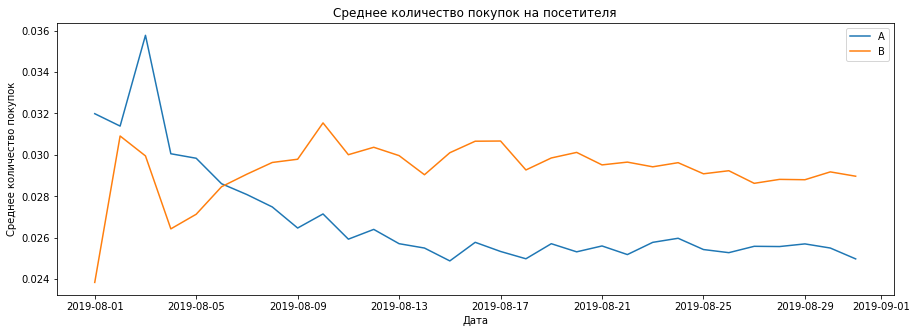

In [21]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(o_agg_a.date, o_agg_a['conversion_A'], label = 'A')
ax.plot(o_agg_b.date, o_agg_b['conversion_B'], label = 'B')
plt.legend()
plt.title('Среднее количество покупок на посетителя')
plt.ylabel('Среднее количество покупок')
plt.xlabel('Дата')
plt.show()

⭐ **Группа А.** Была на пике в период с 1 по 3 августа, затем на протяжении всего периода, держится значительно ниже группы В. 

⭐ **Группа В.** Есть также скачок с 1 по 3 августа, но пик приходится на 10 августа 

### Относительная конверсия

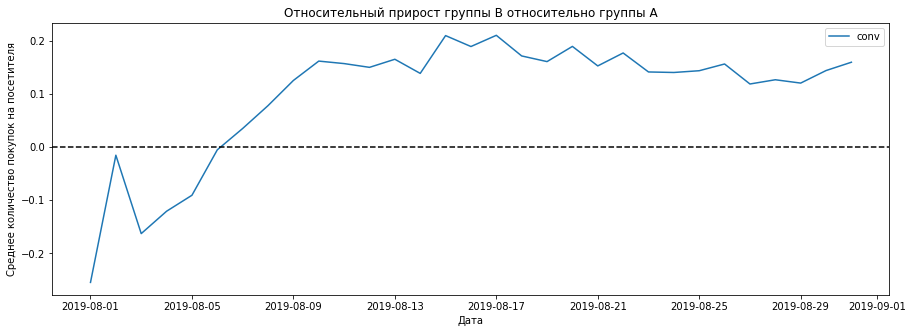

In [22]:
o_agg['conv'] = o_agg_b['conversion_B'] / o_agg_a['conversion_A'] - 1
# строим график
o_agg.plot('date', 'conv', figsize=(15, 5))
plt.title('Относительный прирост группы B относительно группы A')
plt.ylabel('Среднее количество покупок на посетителя')
plt.xlabel('Дата')
plt.axhline(y=0, color='black', linestyle='--') 
plt.show()

Группа А по прежнему имеет показатели ниже В

**Вывод**

Проведя анализ графиков среднего чека и конверсии, можно сказать, что в группе B есть слишком большие значения, они влияют на увеличение среднего чека. В конце теста, конверсия стала стабильной.


## Анализ выбросов

### Заказы пользователей

In [23]:
o_by_user = o_good.groupby('visitorid')['transactionid'].nunique()
o_by_user.sort_values(ascending=False).head(10)

visitorid
3967698036    3
249864742     3
2108163459    3
2988190573    3
3908431265    3
611059232     3
2742574263    3
678354126     2
1404560065    2
1985475298    2
Name: transactionid, dtype: int64

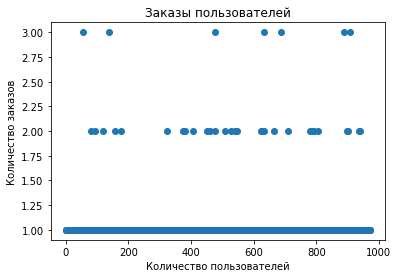

In [24]:
plt.scatter(pd.Series(range(0,len(o_by_user))), o_by_user)
plt.title('Заказы пользователей')
plt.ylabel('Количество заказов')
plt.xlabel('Количество пользователей')
plt.show()

1 заказ сделало большая часть пользователей

Граница для фильтрации по количеству заказов выбрана в размере 1 заказа

In [25]:
# сколько пользователей сделали больше 1 заказа?
print('{:.2%}'.format(len(o_by_user[o_by_user > 1]) / len(o_by_user)))

3.70%


9% пользоватей сделали более 1 заказа

### Количество заказов на пользователя

In [26]:
o_good['revenue'].describe(percentiles=[0.05, 0.50, 0.90, 0.95, 0.99])

count      1016.00
mean       8300.81
std       42121.99
min          50.00
5%          300.00
50%        2955.00
90%       17990.00
95%       26785.00
99%       53904.00
max     1294500.00
Name: revenue, dtype: float64

90-й перцентиль - 18168 руб.

95-й перцентиль - 28000 руб.

99-й пернцентиль - 582333 руб.

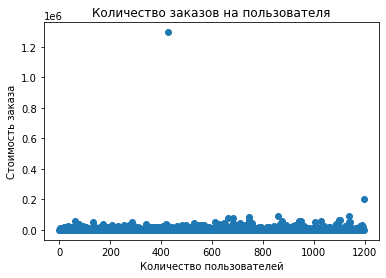

In [27]:
plt.scatter(pd.Series(range(0,len(o))), o['revenue'])
plt.title('Количество заказов на пользователя')
plt.ylabel('Стоимость заказа')
plt.xlabel('Количество пользователей')
plt.show()

In [28]:
print('{:.2%}'.format(len(o_good[o_good.revenue > 27000]) / len(o)))

4.26%


Есть выброс в 1,3 млн. руб, который сместил показатели, нужно отбросить выбросы свыше 27000 руб.

## Статистический анализ

###  Статистическая значимость по "сырым" данным

В даннных есть выбросы и аномалии, используем тест Манна-Уитни для расчета статистической значимости.
Тест Манна-Уитни используется для сравнения списков, поэтому, чтобы рассчитать среднее количество покупок на пользователя, нам потребуется двa спискa, соответствующих по длине количеству посетителей сaйтa в соответствии с рaссмaтривaемой группой, где кaждому пользователю будет соответствовать количество совершенных заказов.

Подготовим данные для анализа. Первая проверка будет по сырым данным, а во второй, устраним аномалии. 

In [29]:
#группировка дней и заказов
o_date = o_good.groupby(['date', 'group']).agg({'transactionid' : 'nunique', 
                                       'visitorid' : 'nunique', 
                                       'revenue' : 'sum'}).sort_values(by=['date','group']).reset_index()
o_date.head(10)

,date,group,transactionid,visitorid,revenue
0,2019-08-01,A,23,19,142779
1,2019-08-01,B,17,17,59758
2,2019-08-02,A,19,18,91602
3,2019-08-02,B,23,22,162043
4,2019-08-03,A,24,24,112473
5,2019-08-03,B,14,14,67049
6,2019-08-04,A,11,11,41176
7,2019-08-04,B,14,13,96890
8,2019-08-05,A,22,22,86383
9,2019-08-05,B,21,21,89908


In [30]:
#группа А

a_data = o_agg_a[['date', 'transactionid', 'revenue', 'v_agg_a']].merge(o_date[o_date['group']=='A']
                                                                                [['date', 'transactionid', 'revenue']], 
                  on='date', how='left')

a_data = a_data.merge(v[v['group'] == 'A'][['date', 'visitors']], on='date', how='left')

a_data.set_axis(['date', 'orders_agg', 'revenue_agg', 'visiters_agg', 'orders_daily', 'revenue_daily', 'visitors_daily'], 
                axis='columns', inplace=True)

In [31]:
#группа В
b_data = o_agg_b[['date', 'transactionid', 'revenue', 'v_agg_b']].merge(o_date[o_date['group']=='B']
                                                                                [['date', 'transactionid', 'revenue']], 
                  on='date', how='left')


b_data = b_data.merge(v[v['group'] == 'B'][['date', 'visitors']], on='date', how='left')

b_data.set_axis(['date', 'orders_agg', 'revenue_agg', 'visiters_agg', 'orders_daily', 'revenue_daily', 'visitors_daily'], 
                axis='columns', inplace=True)

In [32]:
o_users_a = (
    o[o['group'] == 'A'].groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)

o_users_b = (
    o[o['group'] == 'B'].groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)

sample_a = pd.concat([o_users_a['transactionid'], 
                     pd.Series(0,index=np.arange(a_data['visitors_daily'].sum() - len(o_users_a['transactionid'])), 
                               name='orders')], axis=0)

sample_b = pd.concat([o_users_b['transactionid'], 
                     pd.Series(0,index=np.arange(b_data['visitors_daily'].sum() - len(o_users_b['transactionid'])), 
                               name='orders')], axis=0)

**Сформулируем нулевую и альтернативную гипотезу:**


▶ **H0** - статистически значимых различий в среднем количестве покупок на сырых данных между группами нет.

▶ **H1** - статистически значимые различия в среднем количестве покупок на сырых данных между группами есть.

Установим уровень значимости - 5%, `alpha = 0.05`.
Если минимиальный уровень значимости будет меньше того, который был указан, то H0 (нулевая гипотеза) не принимается, а если больше, то мы принимаем нулевую гипотезу.

Для проверки гипотез используем критерий Манна-Уитни, так как в данных есть выбросы.

In [33]:
#задаем уровень статистической значимости
alpha=0.05

#проводим тест и получаем значение минимального уровня значимости
p_value = st.mannwhitneyu(sample_a, sample_b)[1]

#сравниваем с заданным уровнем значимости и анализируем результаты
if p_value < alpha:
    print(
        'Минимальный уровень значимости при оценке сырых данных: {:.3f}, нулевая гипотеза отвергнута'
        .format(p_value)
    )
    print(
        'Относительный прирост среднего количества покупок на пользователя группы B к группе A: {:.2%}'
        .format(sample_b.mean() / sample_a.mean() - 1)
    )
else:
    print(
        'Минимальный уровень значимости при оценке сырых данных: {:.3f}, нулевая гипотеза не может быть отвергнута'
        .format(p_value)
    )
    print(
        'Относительный прирост среднего количества покупок на пользователя группы B к группе A: {:.2%}'
        .format(sample_a.mean() / sample_a.mean() - 1)
    )
    

Минимальный уровень значимости при оценке сырых данных: 0.017, нулевая гипотеза отвергнута
Относительный прирост среднего количества покупок на пользователя группы B к группе A: 13.81%


Статистически значимые различия есть, количество покупок в группах неравномерно. В отношении группы В к группе А, есть прирост на 13,8%.

**Сформулируем нулевую и альтернативную гипотезу:**

▶ **H0** - статистически значимых различий в среднем чеке на сырых данных между группами нет.

▶ **H1** - статистически значимые различия в среднем чеке на сырых данных между группами есть.

In [34]:
#проводим тест и получаем значение минимального уровня значимости
p_value = st.mannwhitneyu(o_good[o_good['group']=='A']['revenue'], 
                                       o_good[o_good['group']=='B']['revenue'])[1]

#сравниваем с заданным уровнем значимости и анализируем результаты
if p_value < alpha:
    print(
        'Минимальный уровень значимости при оценке отфильтрованных данных: {:.3f}, нулевая гипотеза отвергнута'
        .format(p_value)
    )
    print(
        'Относительный прирост среднего количества заказов на пользователя группы B к группе A: {:.2%}'
        .format(o_good[o_good['group']=='B']['revenue'].mean()/
                       o_good[o_good['group']=='A']['revenue'].mean()-1)
    )
else:
    print(
        'Минимальный уровень значимости при оценке отфильтрованных данных: {:.3f}, нулевая гипотеза не может быть отвергнута'
        .format(p_value)
    )
    print(
        'Относительный прирост среднего количества заказов на пользователя группы B к группе A: {:.2%}'
        .format(o_good[o_good['group']=='B']['revenue'].mean()/
                       o_good[o_good['group']=='A']['revenue'].mean()-1)
    )

Минимальный уровень значимости при оценке отфильтрованных данных: 0.829, нулевая гипотеза не может быть отвергнута
Относительный прирост среднего количества заказов на пользователя группы B к группе A: 28.66%


Нулевую гипотезу не отвергаем - между группами нет статистически значимых различий. По итогу проведения теста относительное изменение среднего чека составило 28,7%.

###  Статистическая значимость по очищенным данным


#### Фильтруем аномалии
Уберем выбросы - пользователь сделал больше 1 заказа или оформил заказ дороже 27000 руб.

In [35]:
# пользователи с несколькими заказами

o_filt = o_good.groupby('visitorid')['transactionid'].count().reset_index()
o_filt = o_filt[o_filt['transactionid'] > 1]['visitorid']

# пользователи с дорогими заказами

expensive_orders = o_good[o_good['revenue'] > 26785]['visitorid'].reset_index(drop=True)

# объединим данные
a_b_users = pd.Series((list(o_filt) + list(expensive_orders)), name='visitorsid').drop_duplicates()

#### Относительные потери

Узнаем сколько у нас аномальных пользователей и какой процент они составляют от общего числа уникальных пользователей

In [36]:
len(a_b_users)

86

86 аномальных пользователей 

In [37]:
format(len(a_b_users)/len(set(o['visitorid']))*100, '.2f')

'8.34'

Относительные потери составили 8.34% от общего количества уникальных пользователей из таблицы `orders`

#### Cреднее количество покупок пользователя по «очищенным» данным

In [38]:
group_A_filt = pd.concat([o_users_a.query('not visitorid in @a_b_users')['transactionid'], 
                          pd.Series(0, index=np.arange(a_data['visitors_daily'].sum() - len(o_users_a['transactionid'])), 
                                    name='orders')], axis=0)
group_B_filt = pd.concat([o_users_b.query('not visitorid in @a_b_users')['transactionid'], 
                          pd.Series(0, index=np.arange(b_data['visitors_daily'].sum() - len(o_users_b['transactionid'])), 
                                    name='orders')], axis=0)

**Сформулируем нулевую и альтернативную гипотезу:**

▶ **H0** - статистически значимых различий в среднем чеке на очищенных данных между группами нет.

▶ **H1** - статистически значимые различия в среднем чеке на очищенных данных между группами есть.

In [39]:
print('Минимальный уровень значимости при оценке данных: {:.3f}'.format(st.mannwhitneyu(group_A_filt, group_B_filt)[1]))
print('Относительный прирост среднего количества заказов на пользователя группы B к группе A: {:.2%}'.format(group_B_filt.mean()/group_A_filt.mean()-1))

Минимальный уровень значимости при оценке данных: 0.024
Относительный прирост среднего количества заказов на пользователя группы B к группе A: 14.70%


Гипотеза об отсуствии различия среднего количества заказов между группами отвергнута.

Из рассчитанного относительного различия группы В к группе А мы видим прирост в контролируемой группе на 14.7%.

#### Статистическая значимость различий в среднем чеке заказа по «очищенным» данным.

In [40]:
print('Минимальный уровень значимости при оценке данных: {:.3f}'.format(st.mannwhitneyu(o_good.query('group == "A" and not visitorid in @a_b_users')['revenue'], 
                                      o_good.query('group == "B" and not visitorid in @a_b_users')['revenue'])[1]))

print('Относительный прирост среднего количества среднего чека группы B к группе A: {:.2%}'.format(o_good.query('group == "B" and not visitorid in @a_b_users')['revenue'].mean() / 
                       o_good.query('group == "A" and not visitorid in @a_b_users')['revenue'].mean() - 1))

Минимальный уровень значимости при оценке данных: 0.727
Относительный прирост среднего количества среднего чека группы B к группе A: -3.37%


Нулевую гипотезу опровергнуть не удалось, статистически значимых различий в среднем чеке между группами нет. 

По итогу проведения теста относительное изменение среднего чека уменьшился на -3.37%.

## Принятие решения по результатам теста

<div style="border: solid bisque 2px; padding: 20px; font-size: 16px;"> По условиям проекта, необходимо принять решение по результатам теста:
    
    
1. Остановить тест, зафиксировать победу одной из групп.
2. Остановить тест, зафиксировать отсутствие различий между группами.
3. Продолжить тест.

Фильтрация "сырых" данных от аномалий, мало повлияла на график относительного кумулятивного среднего количества оформления заказов на пользователя. По результатам можно увидеть, что группа В, чаще становится покупателями магазина.
    
Итоговое решение - остановить тест, зафиксировать победу группы В
    
</div>

## Вывод

<div style="border: solid green 2px; padding: 20px"> 
<b> </b>
    
**Цель исследования** - анализ 9 гипотез для увеличения выручки интернет-магазина
___

**Вывод**

* Между сырыми данными и отфильтрованными, есть значимая разница конверсии

* При анализе среднего чека, нет статистически значимого различия
    
* По графику конверсии, группа B показала результаты лучше группы A
    
* Построив график среднего чека по сырым данным, мы смогли увидеть аномальные значения и отфильтровать их
    
* После фильтрации средний чек не имел различий между группами
    
</div>